In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm
import matplotlib.colors as mcolors
from copy import deepcopy

from topofisher.input_simulators.noisy_ring import CircleSimulator

from topofisher.filtrations.numpy.alphaDTML import AlphaDTMLayer

from topofisher.vectorizations.numpy.custom_vectorizations import TOPK
from topofisher.vectorizations.numpy.vectorization_layer import VectorizationLayers
from topofisher.vectorizations.numpy.shorthand_layers import PersistenceImages, PersistenceLandscapes

from topofisher.fisher.Fisher import show_fm_and_bias
from topofisher.fisher.imnn import IMNNLayer, MopedLayer, ExtraDimLayer
from topofisher.fisher.plot_fisher_stats import plotContours2D, plotSummaryDerivativeHists, plot_derivative_convergence


from topofisher.pipelines.circle import CirclePipeline

## Importlib

In [15]:
import importlib
import topofisher
importlib.reload(topofisher.fisher.Fisher)
importlib.reload(topofisher.fisher.imnn)

from topofisher.input_simulators.noisy_ring import CircleSimulator

from topofisher.filtrations.numpy.alphaDTML import AlphaDTMLayer

from topofisher.vectorizations.numpy.custom_vectorizations import TOPK
from topofisher.vectorizations.numpy.vectorization_layer import VectorizationLayers
from topofisher.vectorizations.numpy.shorthand_layers import PersistenceImages, PersistenceLandscapes

from topofisher.fisher.imnn import IMNNLayer, FisherLayer, MopedLayer, ExtraDimLayer
from topofisher.fisher.plot_fisher_stats import plotContours2D, plotSummaryDerivativeHists, plot_derivative_convergence


from topofisher.pipelines.circle import CirclePipeline

## Example usage

In [10]:
vectorizations = [TOPK(bdp_type = "bd", is_binned = True, num_bins = 25), TOPK(bdp_type = "bd", is_binned = True, num_bins = 5)]

vecLayer = VectorizationLayers(vectorizations = vectorizations, hom_dims = [0, 1])
fisherLayer = MopedLayer()
circle_pipeline = CirclePipeline(ncirc= 200, nback = 20, bgmAvg = 1., n_s = 10000, n_d = 10000, \
                                 theta_fid = tf.constant([1., 0.2]), delta_theta = tf.constant([0.1, 0.02]),\
                                 filtLayer = AlphaDTMLayer(m = 0.9, show_tqdm = True),
                                 vecLayer = vecLayer, fisherLayer = fisherLayer, find_derivative = [True, True])
circle_pipeline.run_pipeline()

100%|██████████| 10000/10000 [01:05<00:00, 151.85it/s]


In [11]:
fisher = circle_pipeline.fisher
show_fm_and_bias(fisher)

FM =  [3804.53  486.39  486.39 4305.17]
Fractional bias =  [0.   0.04]


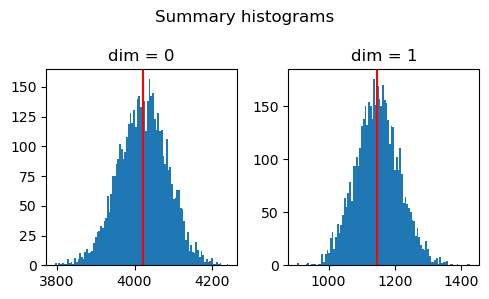

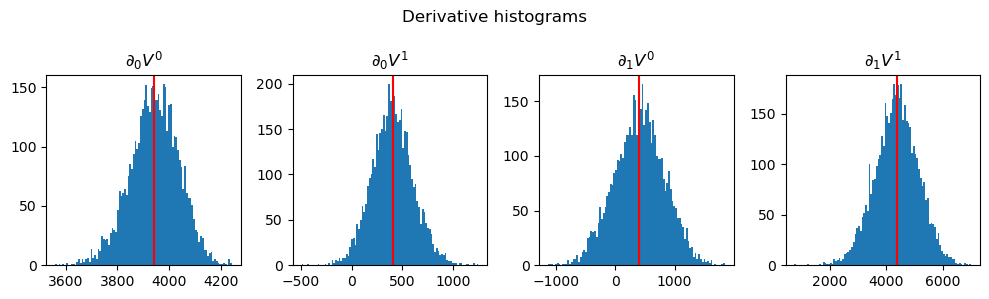

In [12]:
plotSummaryDerivativeHists(fisher)